<a href="https://colab.research.google.com/github/SuperDataWorld/Python/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Build Test Data 

In [ ]:
# a = 3 b = 2 c = 1

a = [1,2,3,4,5,1,0]  
b = [2,1,5,3,7,2,2]
c = [6,3,4,5,7,1,1]
tot = [13,11,23,223,236,28,25]

df = pd.DataFrame({'a':a,'b':b,'c':c,'tot':tot})
df.head()

,a,b,c,tot
0,1,2,6,13
1,2,1,3,11
2,3,5,4,23
3,4,3,5,223
4,5,7,7,236


# Create Linear Regression Model

In [ ]:
# Assign the Training Data
X = df[['a','b','c']]
y = df.tot

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Test Model Accuracy

In [ ]:
model.coef_

array([49.68356457, -2.07684098, -0.12059765])

In [ ]:
# Make a prediction 
X_test = [[1,10,22],[2,4,8],[3,3,3],[20,2,10]]  
y_test = [45,22,18,74]


y_pred = model.predict(X_test)

print('pred')
print(y_pred)
print('test')
print(y_test)

pred
[-4.50907150e-01  6.33820704e+01  1.15745464e+02  9.61598719e+02]
test
[45, 22, 18, 74]


# More Complex Example

## Get Data

In [ ]:
! wget https://raw.githubusercontent.com/SuperDataWorld/Python/main/Data/bikerental.csv 

--2021-08-01 08:38:13--  https://raw.githubusercontent.com/SuperDataWorld/Python/main/Data/bikerental.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56837 (56K) [text/plain]
Saving to: ‘bikerental.csv.1’

bikerental.csv.1    100%[===================>]  55.50K  --.-KB/s    in 0.01s   

2021-08-01 08:38:14 (5.24 MB/s) - ‘bikerental.csv.1’ saved [56837/56837]



In [ ]:
df = pd.read_csv('bikerental.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Deal with Categorical Data 

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.yr.value_counts()


1    366
0    365
Name: yr, dtype: int64

In [ ]:
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.drop(['instant','dteday','registered', 'casual'], axis = 1, inplace = True)

## Create Data for ML and Split

In [ ]:
y = df['cnt']
X = df.drop(['cnt'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

## Train and Fit Model

In [ ]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

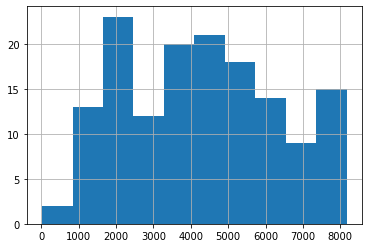

In [ ]:
y_test.hist()

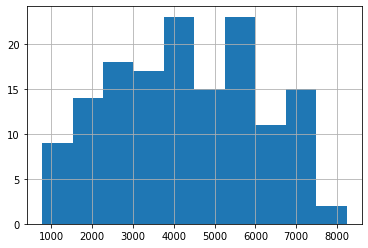

In [ ]:
pd.Series(y_pred).hist()

## Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Root Mean squared error (RMSE):', np.sqrt(mean_squared_error(y_pred, y_test)))
print('Coefficient of determination', r2_score(y_pred, y_test))

Coefficients: [  524.72253637  2023.99754659   -38.44465798  -391.55076626
    72.93700256   160.80489213  -632.8562835   2097.24783578
  3488.04217936  -865.43941913 -2080.54039519]
Intercept: 1248.3209284778145
Root Mean squared error (RMSE): 831.2851545662686
Coefficient of determination 0.7870269233159993


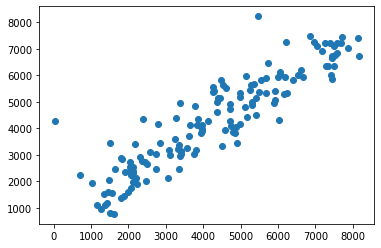

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
df2 = pd.DataFrame([pd.Series(y_test.values), pd.Series(y_pred), pd.Series(X_test.mnth.values)]) 
df2 = df2.transpose()
df2.columns = ['Actual', 'Prediction', 'Month']
df2 = df2.groupby(by = 'Month').sum().reset_index()
df2['% diff'] = round((df2['Prediction'] / df2['Actual']) - 1, 2)
df2

,Month,Actual,Prediction,% diff
0,1.0,15644.0,17997.086510,0.15
1,2.0,22356.0,23538.991753,0.05
2,3.0,71033.0,70308.066534,-0.01
3,4.0,56060.0,52218.580100,-0.07
4,5.0,32156.0,29602.308545,-0.08
5,6.0,57643.0,56835.440641,-0.01
6,7.0,76722.0,80711.075405,0.05
7,8.0,93638.0,92453.738911,-0.01
8,9.0,55594.0,51184.134672,-0.08
9,10.0,34500.0,35826.915226,0.04
